In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import scipy.optimize as sco
import matplotlib.animation as anim
import matplotlib.gridspec as gridspec
%matplotlib inline
sns.set_context("paper", font_scale=2.3, rc={"lines.linewidth" : 1.0, "axes.labelsize" : 15, "axes.titlesize" : 18})
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['DejaVu Sans']

# Phase diagrams
Values of $R_0$ were updated in plot thereafter!

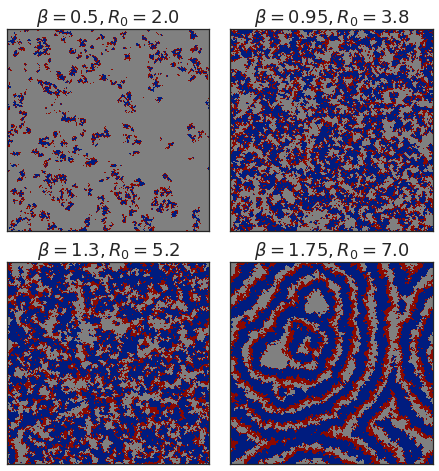

In [17]:
names = [0.5, 0.95, 1.3, 1.75]
data = np.array([np.loadtxt("data/lattice_8/beta/output_final_" + str(k).replace(".", "") + ".txt") for k in names])
sns.set_style("white")


paleta = sns.color_palette("dark", 3)
cmap = clt.ListedColormap(["gray", paleta[2], paleta[0]])
bounds=[0,1,2]
norm = clt.BoundaryNorm(bounds, cmap.N)

tau = 0.5

plt.figure(figsize=(8,8))
for k in xrange(4):
    plt.subplot(2,2,k+1)
    plt.imshow(data[k], cmap=cmap, interpolation="bessel", vmin=0, vmax=2, extent=[0,200,0,200])
    plt.title(r"$\beta ={0}, R_0={1}$".format(names[k], 8.0 * tau * names[k]))
    plt.xticks([],[])
    plt.yticks([],[])
plt.subplots_adjust(wspace=0.0, hspace=0.15)

#plt.savefig("diagrams.eps", bbox_inches='tight')


plt.show()
plt.close()

# Competition of strains
Here there is data to see results of experiments of competition between different strains. 

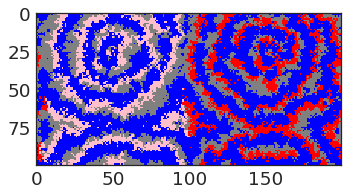

In [4]:
index = 2
use = 11

#proteus/competition/large_initial/videos/video_
#name = "per1_b12t05pp.txt"
name = "two_cities"

#data = np.array([np.loadtxt("proteus/competition/perturbation/video_"+str(index)+str(name))])
#compare = np.array([np.loadtxt("proteus/competition/perturbation/video_beta_"+str(index)+str(name))])

data = np.array([np.loadtxt("data/competition/cities2/video_"+str(index)+str(name))])
compare = np.array([np.loadtxt("data/competition/cities2/video_beta_"+str(index)+str(name))])
sns.set_style("white")

size = 100
c1 = 1.6
c2 = 1.55
for i in xrange(size):
    for j in xrange(2*size):
        if (data[0,i,j] == 1):
            if (compare[0,i,j] == c1):
                data[0,i,j] = 1
            else:
                data[0,i,j] = 3

def nan_if(arr, value):
    return np.where(arr == value, np.nan, arr)


cmap = clt.ListedColormap(['gray', 'red', 'blue', "pink"])
bounds=[0,1,2,3]
norm = clt.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(12,4))
for k in xrange(np.size(data, axis=0)):
    plt.subplot(1,2,k+1)
    plt.imshow(data[k], cmap = cmap, interpolation="none", vmin=0, vmax=3)


plt.show()
plt.close()

# Evolutionary trajectories diagram
Plot of the $\beta$-$\tau_I$ diagram where we represent the results of the equilibrium between wave frequency and increase of $R_0$. We solve the equation $w_{1D}=R_0$ numerically using a bisection method.

In [10]:
def bisection(eq,a,b,nmax=100,tol=1e-3,ftol=1e-5):
    n = 0
    nmax = 100
    #a,b = t0,t1
    while n < nmax:
        c = (a+b)/2.
        f = eq(c)

        if ((b-a)/2. < tol or abs(f) < ftol):
            return c
        
        n += 1
        if np.sign(f) == np.sign(eq(a)):
            a = c
        else:
            b = c

    if (n==nmax):
        print("Bad convergence: {0}".format(c))
    return c

#Solve the equation for tau numerically
def numerical_exact_tau(beta, n, c):
    tau = np.empty(n)
    for j,b in enumerate(beta):
        eq = lambda t : 8*(1-np.exp(-b*t)) - 2*c*b/(1.0 + b*t + b)
        tau[j] = bisection(eq, 0.0, 3.0, tol=1e-7)
    return tau

/home/victor/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in divide


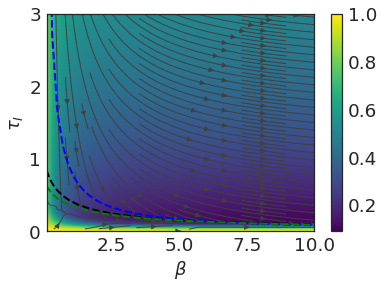

In [11]:
#Prepare variables
n = 50
db = np.linspace(0.1, 10.0, n)
dt = np.linspace(0.0, 3.0, n)
b,t = np.meshgrid(db,dt)
c = 2.8
uno = np.ones(n)
r0 = 8*(1.0-np.exp(-b * t)) #Compute R0
f = c / (1.0/b + t + uno) #Compute frequency of emission



plt.figure()

#Get a 3D potential-like surface to draw over and plot it
superficie = np.maximum(np.exp(-r0), np.exp(-f))
plt.imshow(superficie, origin="lower", interpolation="bicubic",cmap="viridis", extent=[0.001,10.0,0.0,3.0], aspect="auto")
plt.colorbar()

#Do the streamplot
superficie = np.maximum(np.exp(-r0),np.exp(-f))
mask = np.exp(-r0) > np.exp(-f)
superficie[mask] = superficie[mask] * -1.0 
u,v = np.gradient(superficie)

plt.streamplot(b,t,u,v,density=[1.0,2.0], color=(0.25,0.25,0.25))
plt.xlim(0.1, 10.0)
plt.ylim(0.0, 3)

#Plot the trajectories
plt.plot((uno - dt) / (dt * (dt + uno)), dt, c="black", ls="--", lw=2)
plt.plot(db, 6.623 / (8.0 * db), c="blue", ls="--", lw=2)
plt.plot(db, numerical_exact_tau(db,n,2.8), c="green", ls="--", lw=2)

plt.xlabel(r"$\beta$", fontsize = 18)
plt.ylabel(r"$\tau_I$", fontsize = 18)

plt.savefig("diagrama.eps", bbox_inches='tight')
plt.show()
del  b,t,r0,f,u,v,superficie,uno #Delete variables to free space

# Size scaling
Scaling with size of the survival time of a population in the mean-field regime

[  3.34832744e+02  -7.78188892e+04   8.26494461e-01]
[  2.22950232e+03   2.26322858e+05   7.00815620e-01]


/home/victor/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp


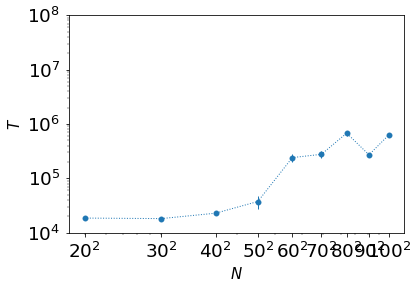

In [2]:
sizes = np.arange(20,110,10)

average = np.empty(np.size(sizes))
error = np.empty(np.size(sizes))
i = 0


#Get the times at which each simulation went off, and get the average over simulations
for s in sizes:
    times = []
    n = 0
    for j in xrange(10):
        counter = j * 10
        data = np.loadtxt("data/scaling/finitesize" + str(s) + "_" + str(counter).zfill(2) +".txt")
        found = False
        k = 0
        while (k < np.size(data[:,1]) and not found):
            if (data[k,1] <= 1e-2):
                found = True
                times.append(data[k,0])
                n += 1
            k += 1
    times = np.array(times)
    if (n > 0):
        average[i]=(np.mean(times))
        error[i]=(np.std(times) / np.sqrt(n))
    else:
        average[i]=0
        error[i]=0
    i += 1

size2 = sizes*sizes

#Fit the curve to a power law
fit,pcov = sco.curve_fit(lambda x,a,b,c: a*np.power(x,c)+b , size2, average, p0=(5e-5,1e4,2.6))
err = np.sqrt(np.diag(pcov))
print(fit)
print(err)

x = np.linspace(400,120*120,1000)
y = fit[1]*np.power(x,fit[2])*np.exp(fit[0]*x)

#Plot!
plt.figure()
plt.scatter(size2, average)
plt.errorbar(size2, average, yerr=error, ls=":")
plt.plot(x,y, ls = "--", color="black")
plt.ylim(1e4,1e8)
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$N$")
plt.ylabel(r"$T$")
plt.xticks(sizes*sizes, [r"${0}^2$".format(k) for k in sizes])
#plt.savefig("scaling.eps")
plt.show()

# Evolutionary trajectories without diffusion

6.42681680792
[ 0.00190881]


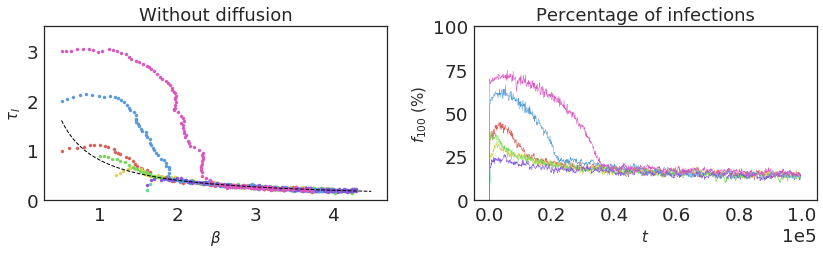

In [23]:
ndata = 7
#These are long, they need a bit of time to load!
data = np.array([np.loadtxt("data/no_dif/sin_dif_largo" + str(k+1) + ".txt") for k in range(ndata)])
def inverse(x,a):
    return a/(8.0 * x)


start = 40000
mean_a, mean_b = 0.0,0.0
for k in [1,2]:
    popt, pcov = sco.curve_fit(inverse, data[k][start:,4], data[k][start:,5], p0=(6.6))
    perr = np.sqrt(np.diag(pcov))
    
    mean_a += popt[0]

mean_a /= 2.0

print(mean_a)
print(perr)


beta = np.linspace(0.5, 4.5, 100)
tau = inverse(beta, mean_a)


paleta = sns.color_palette("hls", ndata)

plt.figure(figsize = (12,4))

plt.subplot(121)
space = 500

for k in xrange(ndata):
    plt.scatter(data[k][::space,4], data[k][::space,5], s=10, c = paleta[k])
plt.plot(beta, tau, color = "black", ls = "--")
plt.xlabel(r"$\beta$")
plt.ylabel(r"$\tau_I$")
plt.ylim(0.0, 3.5)
plt.title("Without diffusion")

plt.subplot(122)
space = 100

data[1][::space, -1] /= 100.0**2.0
data[3][::space, -1] /= 100.0**2.0

for k in xrange(ndata):
    plt.plot(data[k][::space,0], data[k][::space,-1], lw = 0.5, c = paleta[k])
plt.title("Percentage of infections")
plt.ylabel(r"$f_{100}$ (%)")
plt.xlabel(r"$t$")
plt.ylim(0,100)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.tight_layout()

plt.show()
del data

# Evolutionary trajectories with diffusion

['100', '101', '102', '103', '104']
['110', '111', '112', '113', '114']
['120', '121', '122', '123', '124']
['130', '131', '132', '133', '134']


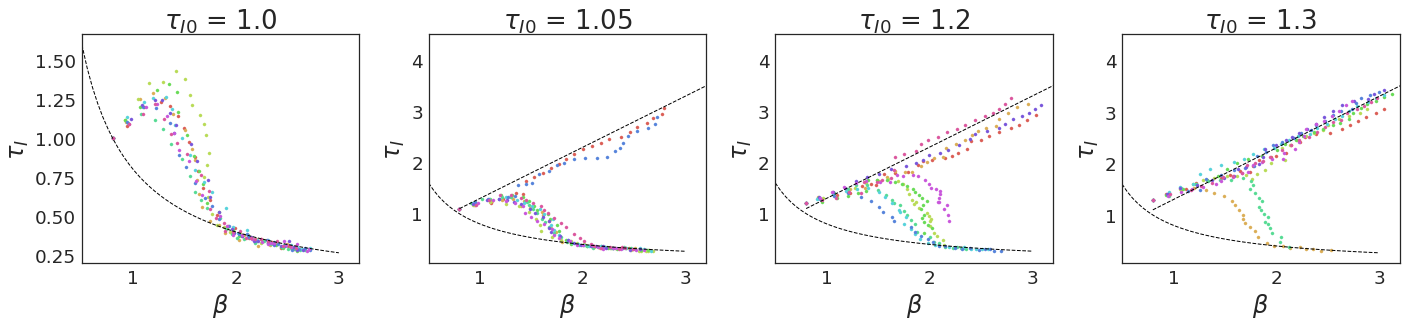

In [3]:
x = np.linspace(0.8, 4.0)
y = x + 0.3 * np.ones(np.size(x))

labelsize = 24
titlesize = 26

add = ["10"]
addsize = 5
name = []
for k in xrange(len(add)):
    name = name + [add[k]+str(j) for j in xrange(addsize)]
print(name)
ndata = len(name)
data = [np.loadtxt("data/ti_transition/beta_08/virusdif" + name[k] + ".txt") for k in range(addsize)]
data = data + [np.loadtxt("data/ti_transition/beta_08/virus2dif" + name[k] + ".txt") for k in range(addsize)]
#This has dcounter = 286 -> D = 0.35

sns.set_style("white")
paleta = sns.color_palette("hls", len(data))

plt.figure(figsize = (20,5))

plt.subplot(141)
for k in xrange(len(data)):
    plt.scatter(data[k][:,1], data[k][:,2], s=10, c = paleta[k])
plt.plot(np.linspace(0.5, 3.0), 6.4/(8*np.linspace(0.5, 3.0)), ls="--", color="black")

plt.xlabel(r"$\beta$", fontsize = labelsize)
plt.ylabel(r"$\tau_I$", fontsize = labelsize)
plt.xlim(0.5,3.2)
plt.title(r"$\tau_{I0}$ = 1.0", fontsize = titlesize)


add = ["11"]
addsize = 5
name = []
for k in xrange(len(add)):
    name = name + [add[k]+str(j) for j in xrange(addsize)]
print(name)
ndata = len(name)
data = [np.loadtxt("data/ti_transition/beta_08/virusdif" + name[k] + ".txt") for k in range(addsize)]
data = data + [np.loadtxt("data/ti_transition/beta_08/virus2dif" + name[k] + ".txt") for k in range(addsize)]
#This has dcounter = 286 -> D = 0.35


plt.subplot(142)
plt.plot(x,y,ls="--",color="black")
for k in xrange(len(data)):
    plt.scatter(data[k][:,1], data[k][:,2], s=10, c = paleta[k])
plt.plot(np.linspace(0.5, 3.0), 6.4/(8*np.linspace(0.5, 3.0)), ls="--", color="black")

plt.xlabel(r"$\beta$", fontsize = labelsize)
plt.ylabel(r"$\tau_I$", fontsize = labelsize)
plt.xlim(0.5,3.2)
plt.title(r"$\tau_{I0}$ = 1.05", fontsize = titlesize)


add = ["12"]
addsize = 5
name = []
for k in xrange(len(add)):
    name = name + [add[k]+str(j) for j in xrange(addsize)]
print(name)
ndata = len(name)
data = [np.loadtxt("data/ti_transition/beta_08_2/virusdif" + name[k] + ".txt") for k in range(addsize)]
data = data + [np.loadtxt("data/ti_transition/beta_08_2/virus2dif" + name[k] + ".txt") for k in range(addsize)]
#This has dcounter = 286 -> D = 0.35


plt.subplot(143)
plt.plot(x,y,ls="--",color="black")
for k in xrange(len(data)):
    plt.scatter(data[k][:,1], data[k][:,2], s=10, c = paleta[k])
plt.plot(np.linspace(0.5, 3.0), 6.4/(8*np.linspace(0.5, 3.0)), ls="--", color="black")

plt.xlabel(r"$\beta$", fontsize = labelsize)
plt.ylabel(r"$\tau_I$", fontsize = labelsize)
plt.xlim(0.5,3.2)
plt.title(r"$\tau_{I0}$ = 1.2", fontsize = titlesize)


add = ["13"]
addsize = 5
name = []
for k in xrange(len(add)):
    name = name + [add[k]+str(j) for j in xrange(addsize)]
print(name)
ndata = len(name)
data = [np.loadtxt("data/ti_transition/beta_08_2/virusdif" + name[k] + ".txt") for k in range(addsize)]
data = data + [np.loadtxt("data/ti_transition/beta_08_2/virus2dif" + name[k] + ".txt") for k in range(addsize)]
#This has dcounter = 286 -> D = 0.35





plt.subplot(144)
plt.plot(x,y,ls="--",color="black")
for k in xrange(len(data)):
    plt.scatter(data[k][:,1], data[k][:,2], s=10, c = paleta[k])
plt.plot(np.linspace(0.5, 3.0), 6.4/(8*np.linspace(0.5, 3.0)), ls="--", color="black")

plt.xlabel(r"$\beta$", fontsize = labelsize)
plt.ylabel(r"$\tau_I$", fontsize = labelsize)
plt.xlim(0.5,3.2)
plt.title(r"$\tau_{I0}$ = 1.3", fontsize = titlesize)


plt.tight_layout()
#plt.savefig("dif.eps", bbox_inches='tight')
plt.show()
plt.close()

# Two interacting subpopulations
Results of two subpopulations that are able to interact

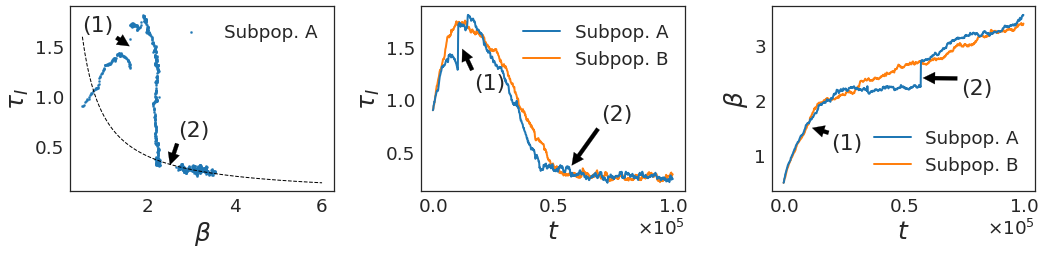

In [13]:
data = np.loadtxt("data/metapops/metapopdif70_6.txt")

#This one shows very clearly the effect we want to illustrate,
#but appears also in many other simulations

#Theoretical Taylor-approximation form of R0
def inverse(x,a):
    return a/(8.0 * x)

pal = sns.color_palette("hls")
c1 = pal.pop()
c2 = pal.pop()

beta = np.linspace(0.5, 6, 100)
tau = inverse(beta, 6.4)

plt.figure(figsize = (15,4))

plt.subplot(131)

space = 1

plt.scatter(data[::space,1], data[::space,2], s=5, label = "Subpop. A")

plt.annotate("(1)", xy=(1.6,1.5), xytext=(0.5,1.65), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("(2)", xy=(2.5,0.3), xytext=(2.7,0.6), arrowprops=dict(facecolor='black', shrink=0.05))


plt.plot(beta, tau, color = "black", ls = "--")
plt.xlabel(r"$\beta$", fontsize = 25)
plt.ylabel(r"$\tau_I$", fontsize = 25)
plt.legend(loc = "upper right")



plt.subplot(132)

plt.plot(data[::space,0], data[::space,2], label = "Subpop. A", lw = 2.0, zorder = 2)
plt.plot(data[::space,0], data[::space,4], label = "Subpop. B", lw = 2.0, zorder = 1)

plt.annotate("(1)", xy=(12000,1.5), xytext=(17000,1.1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("(2)", xy=(57200,0.35), xytext=(70000,0.8), arrowprops=dict(facecolor='black', shrink=0.05))


plt.legend(loc = "upper right")



plt.xlabel(r"$t$", fontsize = 25)
plt.ylabel(r"$\tau_I$", fontsize = 25)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.gca().xaxis.major.formatter._useMathText = True

plt.subplot(133)

plt.plot(data[::space,0], data[::space,1], label = "Subpop. A", lw = 2.0, zorder=2)
plt.plot(data[::space,0], data[::space,3], label = "Subpop. B", lw = 2.0, zorder=1)

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.gca().xaxis.major.formatter._useMathText = True

plt.xlabel(r"$t$", fontsize = 25)
plt.ylabel(r"$\beta$", fontsize = 25)

plt.annotate("(1)", xy=(11500,1.5), xytext=(20000,1.1), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("(2)", xy=(57200,2.4), xytext=(74000,2.1), arrowprops=dict(facecolor='black', shrink=0.05))


plt.legend(loc = "lower right")

plt.tight_layout()
plt.savefig("two_subpop.eps")

plt.show()

# Finite size effects
Here we have some plots demonstrating what are the finite size effects. We show that correlation lenght tends to couple to system size, producing the finite size effect.
The figure of Supplementary Information has been made with frames of the the video included in the folder size_70/videos/video_Xno_dif_long4_s70.txt. There are 1000 frames in total.

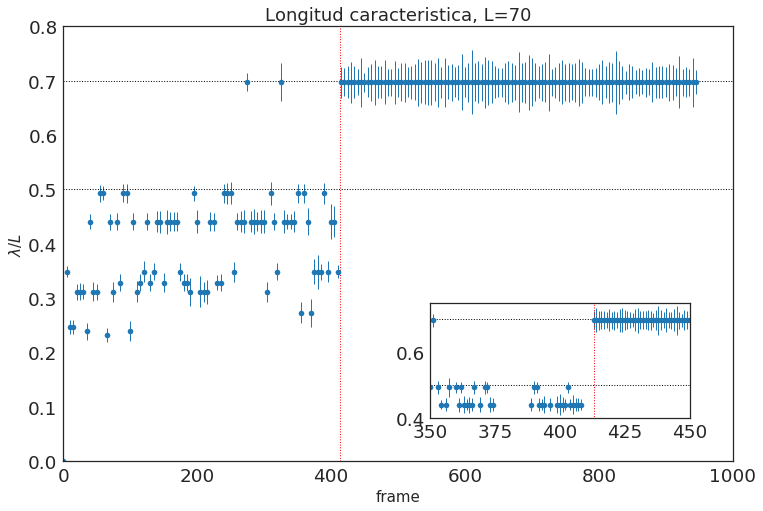

In [4]:
spacesize = 70
#curve = np.loadtxt("proteus/size_70/output/no_dif_long1_s70.txt")
#curve = np.loadtxt("proteus/no_dif_completo/output/no_dif_long4.txt")

def compute_things():
    nfiles = 950
    wavelength = np.zeros(nfiles)
    errwavelength = np.zeros(nfiles)
    
    #Create the frequency linspace
    x = np.linspace(0, spacesize, spacesize)
    dt = spacesize / (1.0 * x.size)
    f = np.linspace(-1.0/(2.0*dt), 1.0/(2.0*dt), x.size)
    dist = abs(f[1]-f[0]) #Step between two modes

    sns.set_style("white")

    for k in xrange(nfiles):
        #Load each data
        data = np.loadtxt("data/size_70/videos/video_"+str(k)+"no_dif_long4_s70.txt")
        #data = np.loadtxt("proteus/no_dif_completo/videos/video_"+str(k)+"no_dif_long4.txt")


        #Do the 2-d Fourier transform
        fourier = np.fft.fft2((data == 1).astype(int))
        fourier = np.fft.fftshift(fourier)
        fourier = np.abs(fourier) #Absolute value
        fourier[spacesize/2,spacesize/2] = 0.0 #Elimiante the (0,0) which is not relevant for harmonics


        thres = 51 #Set a (high) threshold
        nelem = 0
        #Repeat until we detect or until we realize we cannot do anything,
        while (nelem == 0 and thres > 0):
            mask = np.where(fourier > thres) #Get who's greater than threshold
            nelem = len(mask[0])/2 #Get who many we have to check (/2 because of symmetry)
            thres -= 50 #Reduce threshold to increase resolution in case we did not find anything
        ds = np.empty(nelem) #To store wavelengths
        intensity = np.empty(nelem) #Intensity of each mode
        if (thres > 0): #If we detected something, for each element detected,
            for j in xrange(nelem):
                #Get where it is
                fil = mask[0][j]
                col = mask[1][j]
                #Compute distance in momentum space
                dx = (fil-spacesize/2.0) * dist
                dy = (col-spacesize/2.0) * dist
                d = np.sqrt(dx*dx+dy*dy)
                ds[j] = 1.0/d #Compute wavelength as the inverse of the distance
                intensity[j] = fourier[fil,col] #Store intensity

            #wavelength[k] = np.mean(ds)
            #wavelength[k] = np.max(ds)
            wavelength[k] = ds[np.argmax(intensity)] #Get wl of the most intense mode
            errwavelength[k] = np.std(ds)/np.sqrt(nelem) #Error as stdev of data
        else:
            wavelength[k], errwavelength[k]  = 0.0, 0.0
    return wavelength, errwavelength


wavelength, errwavelength = compute_things()
#print(wavelength[500])
#Plot everything
spacesize = 1.0 * spacesize
plt.figure(figsize=(12,8))
jump = 5
plt.errorbar(np.arange(950)[::jump], wavelength[::jump]/spacesize, yerr=errwavelength[::jump]/spacesize, ls = "none", marker="o")
#plt.errorbar(curve[:95000:100*jump,1], wavelength[::jump]/spacesize, yerr=errwavelength[::jump]/spacesize, ls="none", marker="o")
plt.plot((0,1000),(0.5,0.5),ls=":",c="black")
plt.plot((0,1000),(0.7,0.7),ls=":",c="black")
plt.plot((413,413),(0,1),ls=":",c="red")
plt.ylim(0.0,0.8)
plt.xlim(0.0,1000.0)
plt.title("Charasteristic lenght, L=70")
plt.ylabel(r"$\lambda/L$")
plt.xlabel("frame")

axis = plt.axes([0.55,0.2,0.3,0.2])
jump = 1
plt.errorbar(np.arange(950)[::jump], wavelength[::jump]/spacesize, yerr=errwavelength[::jump]/spacesize, ls="none", marker="o")
plt.plot((0,1000),(0.5,0.5),ls=":",c="black")
plt.plot((0,1000),(0.7,0.7),ls=":",c="black")
plt.plot((413,413),(0,1),ls=":",c="red")

plt.xlim(350,450)
plt.ylim(0.4,0.75)
#plt.scatter(np.arange(950)[::jump], wavelength[::jump])




#plt.savefig("lambda_70.png", dpi=400)
#plt.ylim(0,60)
#plt.xlim(400,410)
#plt.plot((400,720),(31,31),ls="--",c="black")
plt.show()